In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import defaultdict

In [2]:
mlp_results_dir = Path('Results/MLPTrainingAndTesting')
mlp_csv_file = "mlp_training_results.csv"

svm_results_dir = Path('Results/SVMTrainingAndTesting')
svm_csv_file = "svm_training_result.csv"

plots_dir = Path('Plots/ModelComparison')
plots_dir.mkdir(exist_ok=True)

In [3]:
def get_mean_test_accuracies(csv_file):
    # Initialize a dictionary to store test accuracies for each n
    test_accuracies = defaultdict(list)
    with open(csv_file, mode="r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Extract n and test_acc, and append the test_acc to the respective list
            n = int(row["n"])
            test_acc = float(row["test_acc"])
            test_accuracies[n].append(test_acc)

    # Calculate mean test accuracy for each n
    mean_test_accuracies = {n: sum(acc_list) / len(acc_list) for n, acc_list in test_accuracies.items()}
    return mean_test_accuracies

In [4]:
mlp_test_accuracies = get_mean_test_accuracies(mlp_results_dir / mlp_csv_file)
svm_test_accuracies = get_mean_test_accuracies(svm_results_dir / svm_csv_file)

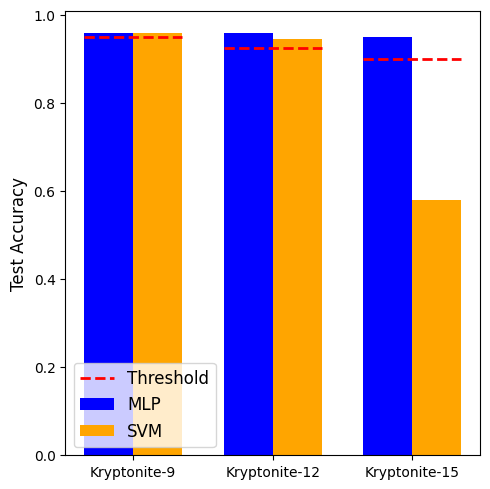

In [5]:
n_values = [9, 12, 15]
accuracy_thresholds = [0.95, 0.925, 0.9]

mlp_accuracies = [mlp_test_accuracies[n] / 100 for n in n_values] # mlp accuracies are stored as percentage
svm_accuracies = [svm_test_accuracies[n] for n in n_values]

# Create the bar chart
plt.figure(figsize=(5, 5))
bar_width = 0.35  # Width of each bar
x = np.arange(len(n_values))  # Positions for bars
plt.bar(x - bar_width / 2, mlp_accuracies, width=bar_width, label="MLP", color="blue")
plt.bar(x + bar_width / 2, svm_accuracies, width=bar_width, label="SVM", color="orange")

# Add red dashed lines for accuracy thresholds only on bars for each n
for i, threshold in enumerate(accuracy_thresholds):
    # Draw a red dashed line centered on each MLP and SVM bar for the given n
    plt.plot(
        [x[i] - bar_width, x[i] + bar_width],  # Horizontal range for the line
        [threshold, threshold],  # Fixed height (threshold)
        color="red",
        linestyle="--",
        linewidth=2,
        label="Threshold" if i == 0 else None
    )

# Add x labels, y labels, title, and legend
#plt.xlabel("Dataset Size (n)", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
# plt.title("Comparison of MLP and SVM Test Accuracies", fontsize=14)
plt.xticks(x, [f"Kryptonite-{n}" for n in n_values])  # Add custom labels for the x-axis
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig(plots_dir / "mlp_vs_svm.svg", format="svg")
plt.show()